In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import Sequence,to_categorical

import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook   ##顯示進度條
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import time

from tensorflow.keras.models import Model
from tensorflow.keras import optimizers


/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df_train = pd.read_csv('./data/train.csv')
df_train = df_train.drop(labels=['Id'],axis=1)

In [3]:
X_train = df_train.drop(labels=['Cover_Type'],axis=1).values
y_train = df_train['Cover_Type'].values

In [4]:
scaler = MinMaxScaler()
X_train = X_train.astype(np.float32)
X_train = scaler.fit_transform(X_train)

# one hot

In [5]:
y_train = to_categorical(y_train-1)

In [6]:
from sklearn.model_selection import train_test_split
train_x , test_x , train_y , test_y = train_test_split(X_train,y_train , test_size=.2 , random_state=42 )

# build model

In [7]:
(X_train.shape[1],)

(54,)

In [8]:
X_train.shape[1]

54

In [9]:
def build_model():
    model_input = layers.Input(shape=(X_train.shape[1],))
    x = layers.Dense(512,activation='relu')(model_input)
    x = layers.Dense(256,activation='relu')(x)
    x = layers.Dense(128,activation='relu')(x)
    x = layers.Dense(7,activation='softmax')(x)
    
    return Model(model_input ,x)
    

In [10]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 54)                0         
_________________________________________________________________
dense (Dense)                (None, 512)               28160     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 903       
Total params: 193,287
Trainable params: 193,287
Non-trainable params: 0
_________________________________________________________________


# optimizer , loss , metrics

In [11]:
opt = optimizers.Adam(lr=0.0001 , beta_1 = 0.5)
model.compile(loss='categorical_crossentropy' , optimizer=opt , metrics=['acc'])

# callbacks - ModelCheckpoint , early stopping

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

check_pointer = ModelCheckpoint(filepath='./weights.hdf5',save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [13]:
history = model.fit(X_train,y_train,batch_size=32,epochs=10,validation_data=(test_x,test_y),callbacks=[check_pointer,early_stop])



Train on 14364 samples, validate on 2873 samples
Epoch 1/10
14364/14364 [==============================] - 2s 171us/step - loss: 1.1952 - acc: 0.5665 - val_loss: 0.9173 - val_acc: 0.6095
Epoch 2/10
14364/14364 [==============================] - 1s 100us/step - loss: 0.8493 - acc: 0.6376 - val_loss: 0.8152 - val_acc: 0.6648
Epoch 3/10
14364/14364 [==============================] - 1s 100us/step - loss: 0.7919 - acc: 0.6662 - val_loss: 0.7632 - val_acc: 0.6787
Epoch 4/10
14364/14364 [==============================] - 1s 100us/step - loss: 0.7548 - acc: 0.6827 - val_loss: 0.7352 - val_acc: 0.6979
Epoch 5/10
14364/14364 [==============================] - 1s 100us/step - loss: 0.7252 - acc: 0.6903 - val_loss: 0.7133 - val_acc: 0.7066
Epoch 6/10
14364/14364 [==============================] - 2s 108us/step - loss: 0.7010 - acc: 0.7039 - val_loss: 0.6915 - val_acc: 0.7041
Epoch 7/10
14364/14364 [==============================] - 2s 106us/step - loss: 0.6797 - acc: 0.7113 - val_loss: 0.6579 - v

In [17]:
# history.history

In [18]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

# 畫圖

In [20]:
import matplotlib.pyplot as plt

In [21]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']


In [22]:
epochs_ = range(1,len(acc)+1)

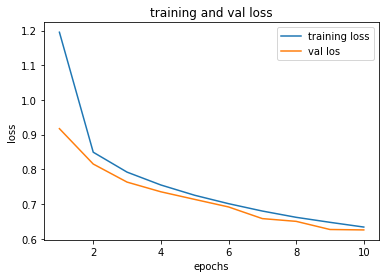

In [23]:
plt.plot(epochs_ , loss , label = 'training loss')
plt.plot(epochs_ , val_loss , label = 'val los')
plt.title('training and val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

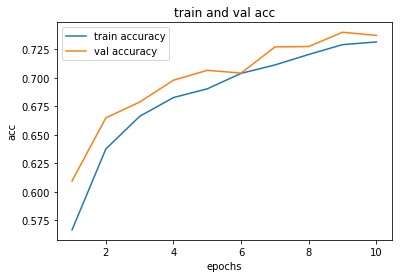

In [24]:
plt.clf()
plt.plot(epochs_ , acc , label='train accuracy')
plt.plot(epochs_ , val_acc , label = 'val accuracy')
plt.title('train and val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [20]:
train_x.shape

(11491, 54)

In [21]:
train_y.shape

(11491, 7)

# 另一種不寫死的方法

In [25]:
batch_size=32
epochs=10
every_print =5

In [26]:
model = build_model()

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])

In [27]:


train_epoch_losses , valid_epoch_losses = [],[]
train_epoch_acc , valid_epoch_acc = [],[]

for i in range(epochs):
    start_time = time.time()
    print(f"\nepoch: {i+1}/{epochs} \n")
    
    batch_num = int(np.ceil(len(train_x)/batch_size))
    split_step = batch_num // every_print
    
    train_losses = []
    train_batch_acc = []
    
    for j in range(batch_num):
        
        batch_x = train_x[j*batch_size:min((j+1)*batch_size , len(train_x))]
        batch_y = train_y[j*batch_size:min((j+1)*batch_size , len(train_y))]
        
        ###
        batch_loss , batch_acc = model.train_on_batch(batch_x , batch_y)
        ###
        
        
        train_losses.append(batch_loss)
        train_batch_acc.append(batch_acc)
        
        
        if j%split_step==0:
            print('train_loss:%5.3f \ttrain_acc:%5.3f'  % (batch_loss,batch_acc))
    
    duration = time.time() - start_time
    
    valid_loss , valid_acc = model.test_on_batch(test_x , test_y)
    print(f"epoch {i+1}: loss:{valid_loss:5.3f}\tacc:{valid_acc*100:5.2f}%")
    print( f"time per epoch: {duration:4.4f} sec \n") 
    
    train_loss_avg = np.mean(train_losses)
    train_acc_avg = np.mean(train_batch_acc)
    
    train_epoch_losses.append(train_loss_avg)
    train_epoch_acc.append(train_acc_avg)
    
    valid_epoch_losses.append(valid_loss)
    valid_epoch_acc.append(valid_acc)
        
    
            
            
            
            
        


epoch: 1/10 

train_loss:1.923 	train_acc:0.312
train_loss:1.273 	train_acc:0.312
train_loss:0.917 	train_acc:0.656
train_loss:0.788 	train_acc:0.625
train_loss:0.601 	train_acc:0.719
epoch 1: loss:0.807	acc:64.46%
time per epoch: 1.6539 sec 


epoch: 2/10 

train_loss:0.807 	train_acc:0.688
train_loss:1.062 	train_acc:0.500
train_loss:0.685 	train_acc:0.719
train_loss:0.725 	train_acc:0.688
train_loss:0.523 	train_acc:0.719
epoch 2: loss:0.713	acc:69.13%
time per epoch: 0.9656 sec 


epoch: 3/10 

train_loss:0.691 	train_acc:0.812
train_loss:1.001 	train_acc:0.531
train_loss:0.632 	train_acc:0.781
train_loss:0.684 	train_acc:0.750
train_loss:0.521 	train_acc:0.719
epoch 3: loss:0.678	acc:70.87%
time per epoch: 0.9661 sec 


epoch: 4/10 

train_loss:0.626 	train_acc:0.812
train_loss:0.963 	train_acc:0.531
train_loss:0.600 	train_acc:0.781
train_loss:0.640 	train_acc:0.781
train_loss:0.521 	train_acc:0.719
epoch 4: loss:0.665	acc:71.15%
time per epoch: 0.9681 sec 


epoch: 5/10 

train

# 自定義model

In [28]:
class network(keras.Model):
    def __init__(self):
        super(network,self).__init__()
        self.layer_1 = layers.Dense(512 , activation='relu' )
        self.layer_2 = layers.Dense(256 , activation='relu')
        self.layer_3 = layers.Dense(128 , activation='relu' )
        self.output_layer = layers.Dense(7 , activation='softmax',)
        
    def call(self,x):
        x_1 = self.layer_1(x)
        x_2 = self.layer_2(x_1)
        x_3 = self.layer_3(x_2)
        predict = self.output_layer(x_3)
        
        return predict

In [29]:
model = network()
model.compile(loss='categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])

In [31]:
# model.summary()

In [32]:

train_epoch_losses , valid_epoch_losses = [],[]
train_epoch_acc , valid_epoch_acc = [],[]

for i in range(epochs):
    start_time = time.time()
    print(f"\nepoch: {i+1}/{epochs} \n")
    
    batch_num = int(np.ceil(len(train_x)/batch_size))
    split_step = batch_num // every_print
    
    train_losses = []
    train_batch_acc = []
    
    for j in range(batch_num):
        
        batch_x = train_x[j*batch_size:min((j+1)*batch_size , len(train_x))]
        batch_y = train_y[j*batch_size:min((j+1)*batch_size , len(train_y))]
        
        ###
        batch_loss , batch_acc = model.train_on_batch(batch_x , batch_y)
        ###
        
        train_losses.append(batch_loss)
        train_batch_acc.append(batch_acc)
        
        
        if j%split_step==0:
            print('train_loss:%5.3f \ttrain_acc:%5.3f'  % (batch_loss,batch_acc))
    
    duration = time.time() - start_time
    
    ###
    valid_loss , valid_acc = model.test_on_batch(test_x , test_y)
    ###
    
    print(f"epoch {i+1}: loss:{valid_loss:5.3f}\tacc:{valid_acc*100:5.2f}%")
    print( f"time per epoch: {duration:4.4f} sec \n") 
    
    train_loss_avg = np.mean(train_losses)
    train_acc_avg = np.mean(train_batch_acc)
    
    train_epoch_losses.append(train_loss_avg)
    train_epoch_acc.append(train_acc_avg)
    
    valid_epoch_losses.append(valid_loss)
    valid_epoch_acc.append(valid_acc)


epoch: 1/10 

train_loss:1.941 	train_acc:0.250
train_loss:1.232 	train_acc:0.406
train_loss:0.852 	train_acc:0.625
train_loss:0.794 	train_acc:0.719
train_loss:0.570 	train_acc:0.688
epoch 1: loss:0.807	acc:64.74%
time per epoch: 1.7808 sec 


epoch: 2/10 

train_loss:0.828 	train_acc:0.750
train_loss:1.101 	train_acc:0.438
train_loss:0.677 	train_acc:0.750
train_loss:0.721 	train_acc:0.688
train_loss:0.554 	train_acc:0.750
epoch 2: loss:0.720	acc:68.64%
time per epoch: 0.9607 sec 


epoch: 3/10 

train_loss:0.688 	train_acc:0.781
train_loss:1.044 	train_acc:0.531
train_loss:0.633 	train_acc:0.719
train_loss:0.699 	train_acc:0.719
train_loss:0.530 	train_acc:0.719
epoch 3: loss:0.687	acc:69.82%
time per epoch: 0.9744 sec 


epoch: 4/10 

train_loss:0.615 	train_acc:0.844
train_loss:0.992 	train_acc:0.562
train_loss:0.574 	train_acc:0.781
train_loss:0.634 	train_acc:0.719
train_loss:0.521 	train_acc:0.719
epoch 4: loss:0.673	acc:70.38%
time per epoch: 0.9606 sec 


epoch: 5/10 

train